# Measure runtime of stats algorithms
November 14, 2018

**Overview:**
We are planning on adding algorithms to NDMG. @GaneshArvapalli compiled all of the algorithms into a single [python script](https://github.com/NeuroDataDesign/the-ents/blob/master/src/features/stats_explained.md). In this notebook, we measure the runtime of each of the algorithms and see how runtime relates to the size of the graph (n) and the connectivity of the graph (p).

In [1]:
import numpy as np
import networkx as nx
import os

from src.data.edgelist_io import read_edgelist
from timing import measure_runtime

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def estimate_phat(G):

    # Get matrix
    A = nx.to_numpy_matrix(G)
    n = A.shape[0]

    # Count upper triangular elements
    edges = np.count_nonzero(np.triu(A))
    num_upper = n * (n + 1) / 2

    # Estimate phat
    phat = edges / num_upper
    return n, phat

In [3]:
filepath='../../data/raw/hbn/'
atlases = os.listdir(filepath)

for i in ['DS72784', '.DS_Store']:
    atlases.remove(i)

In [4]:
results = {}

for atlas in atlases:
    
    print(atlas)
    p_i = []
    
    filelist = os.listdir(filepath + atlas)
    filelist = np.random.choice(filelist, 10)
    
    for file in filelist:
        path = filepath + atlas + '/' + file
        G = read_edgelist(path)
        
        try:
            n, phat_i = estimate_phat(G)
            p_i += [phat_i]
        except:
            pass

        # Attach to dictionary
        p_hat = np.mean(p_i)
        results[atlas] = [n, p_hat]

AAL
DS00195
DS01216
DS03231
desikan
DS00446
DS00071
DS00096
JHU
tissue
DS00833


/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


DS06481
CPAC200
DS01876
DS00350
HarvardOxford
hemispheric
DS00108
DS00278
slab907
DS16784
Talairach
DS00583
DS00140
slab1068


In [56]:
pprint.pprint(results)

{'AAL': [116, 0.25566306590294596],
 'CPAC200': [200, 0.10130348258706467],
 'DS00071': [1, 0.3320909035104887],
 'DS00096': [90, 0.19295432353836522],
 'DS00108': [103, 0.17608294840127459],
 'DS00140': [135, 0.13742696310198102],
 'DS00195': [184, 0.11200592688642261],
 'DS00278': [266, 0.09155792185718255],
 'DS00350': [341, 0.08139943004413827],
 'DS00446': [420, 0.06533744387012949],
 'DS00583': [566, 0.05777446442382732],
 'DS00833': [778, 0.04215079665534619],
 'DS01216': [1146, 0.030558112902891073],
 'DS01876': [1754, 0.023397133169459728],
 'DS03231': [2953, 0.015796377888910102],
 'DS06481': [5881, 0.00906373180956105],
 'DS16784': [15428, 0.004438395993374011],
 'HarvardOxford': [111, 0.2225078975078975],
 'JHU': [48, 0.35085034013605443],
 'Talairach': [972, 0.05591498194917338],
 'desikan': [70, 0.43154929577464796],
 'hemispheric': [2, 1.0],
 'slab1068': [1056, 0.01634473503486509],
 'slab907': [899, 0.012602433360224277],
 'tissue': [3, 1.0]}


In [9]:
timing_res = {}

for key, value in results.items():
    
    print(key)
    n, phat = value
    
    if n <= 1000:
        atlas = key
        times = measure_runtime(n, phat)
        timing_res[atlas] = times

AAL
DS00195
DS01216
DS03231
desikan
DS00446
DS00071
DS00096
JHU
tissue
DS00833
DS06481
CPAC200
DS01876
DS00350
HarvardOxford
hemispheric
DS00108
DS00278
slab907
DS16784
Talairach
DS00583
DS00140
slab1068


In [15]:
from src.features.summary import Stats
from src.random.bernoulli import RandomGraph

In [18]:
A = RandomGraph(**{'n': 5, 'p': 0.1})
s = Stats(A)

public_method_names = [method for method in dir(s) if callable(
    getattr(s, method)) if not method.startswith('_')]
for method in ['return_stats', 'khop_locality', 'scan_statistic']:
    public_method_names.remove(method)

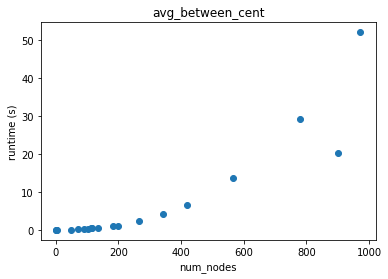

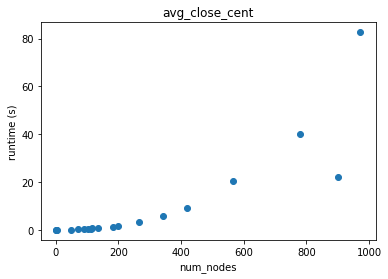

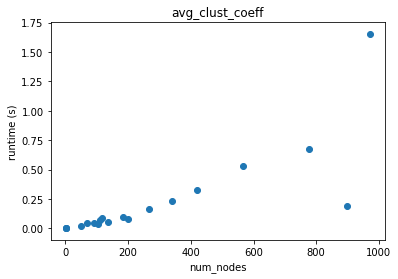

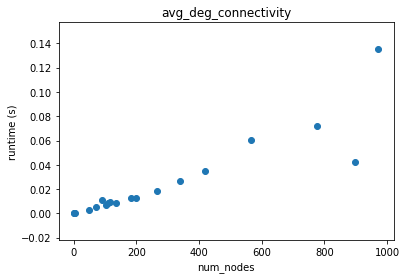

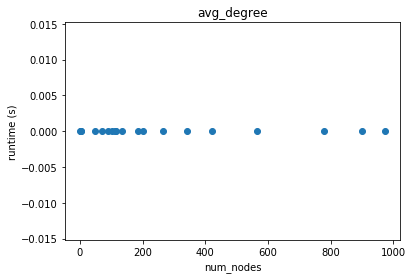

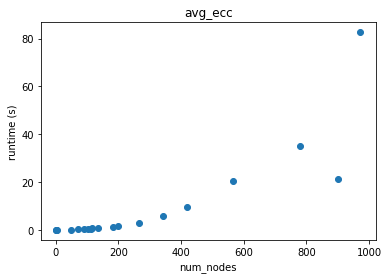

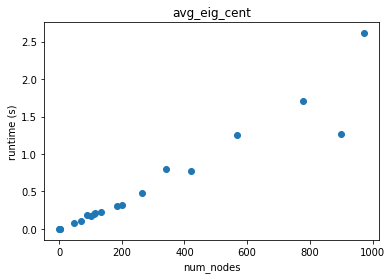

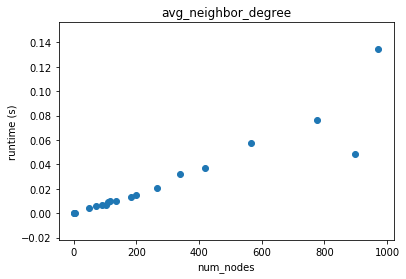

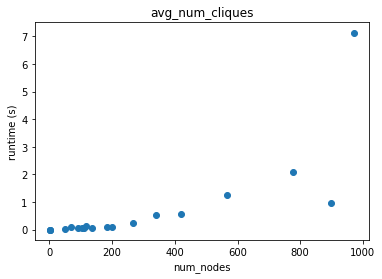

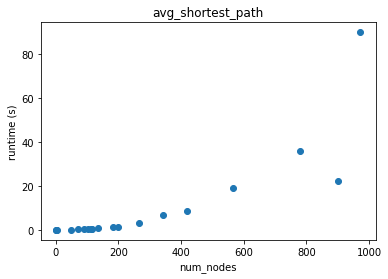

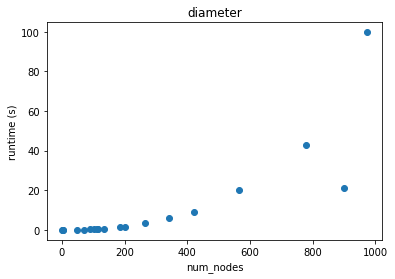

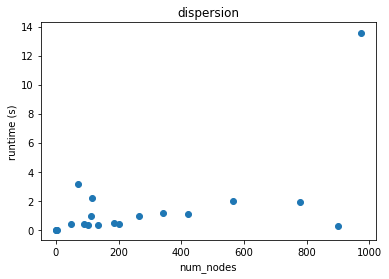

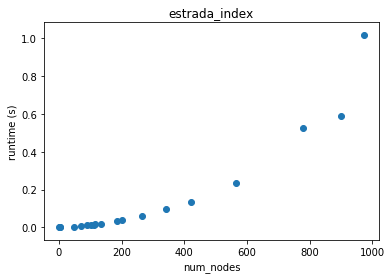

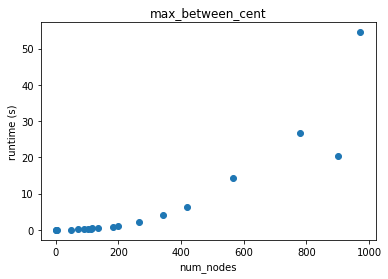

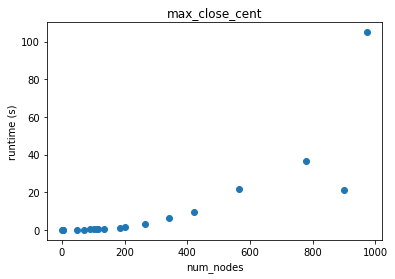

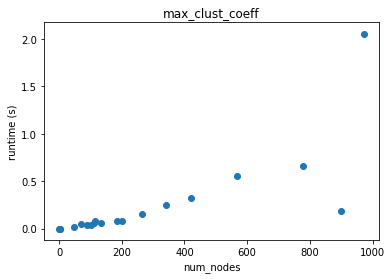

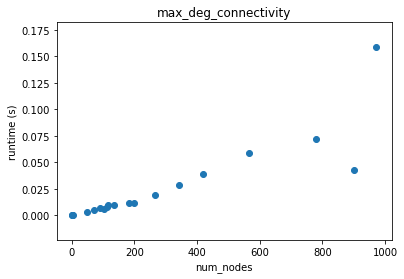

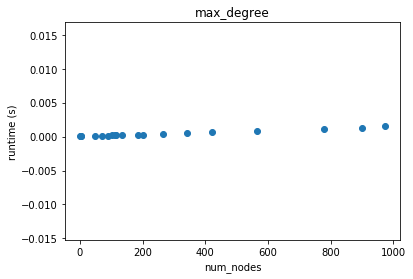

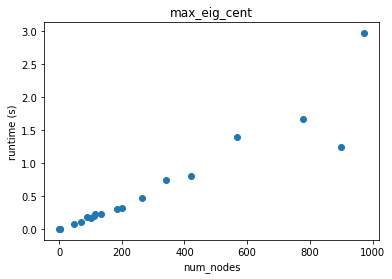

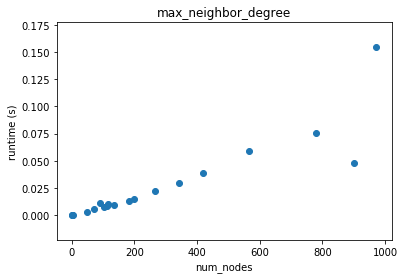

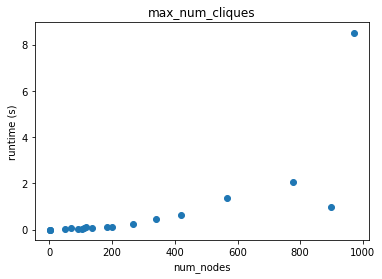

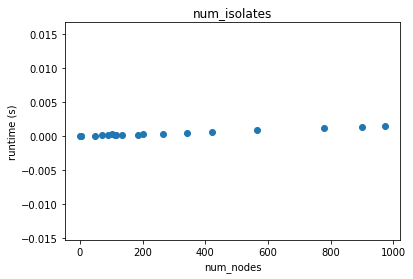

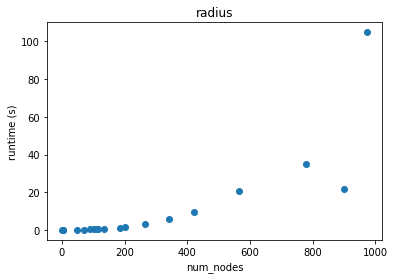

In [31]:
for i, method in enumerate(public_method_names):
    x, y = [], []
    for key, value in timing_res.items():
        x += [value[0]]
        y += [value[i+2]]
        
    plt.scatter(x, y)
    
    plt.xlabel('num_nodes')
    plt.ylabel('runtime (s)')
    plt.title(method)
    plt.show()

In [118]:
d = {method:time for method,time in zip(public_method_names, timing_res['Talairach'][2:])}
a = sorted(d.items(), key=lambda x: x[1])

print('timing results:')
pprint.pprint([(i[0], round(i[1], 4)) for i in a])

timing results:
[('avg_degree', 0.0),
 ('num_isolates', 0.0015),
 ('max_degree', 0.0016),
 ('avg_neighbor_degree', 0.1345),
 ('avg_deg_connectivity', 0.1353),
 ('max_neighbor_degree', 0.1544),
 ('max_deg_connectivity', 0.159),
 ('estrada_index', 1.018),
 ('avg_clust_coeff', 1.6541),
 ('max_clust_coeff', 2.0551),
 ('avg_eig_cent', 2.6092),
 ('max_eig_cent', 2.965),
 ('avg_num_cliques', 7.1282),
 ('max_num_cliques', 8.5224),
 ('dispersion', 13.592),
 ('avg_between_cent', 51.9483),
 ('max_between_cent', 54.5082),
 ('avg_ecc', 82.6111),
 ('avg_close_cent', 82.6355),
 ('avg_shortest_path', 90.084),
 ('diameter', 99.7345),
 ('radius', 104.7698),
 ('max_close_cent', 104.9244)]


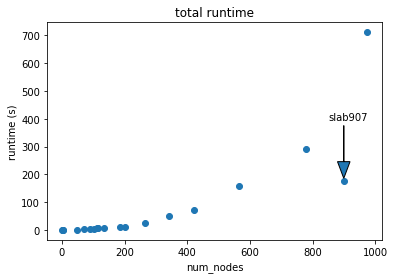

In [94]:
x, y = [], []
for key, value in timing_res.items():
    x += [value[0]]
    y += [sum(value[2:])]

plt.scatter(x, y)

plt.xlabel('num_nodes')
plt.ylabel('runtime (s)')
plt.title('total runtime')

plt.text(850, 176+220, 'slab907')
plt.arrow(899, 176+200, 0, -130, head_width=40)

plt.show()

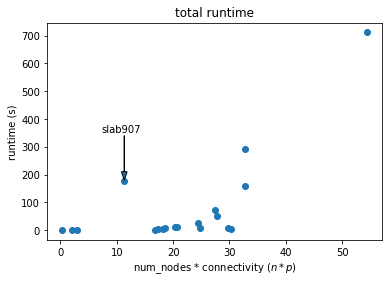

In [132]:
x, y = [], []
for key, value in timing_res.items():
    x += [value[0] * value[1]]
    y += [sum(value[2:])]

plt.scatter(x, y)

plt.xlabel(r'num_nodes * connectivity ($n*p$)')
plt.ylabel('runtime (s)')
plt.title('total runtime')

plt.text(x[-4]-4, 350, 'slab907')
plt.arrow(x[-4], 340, 0, -130, head_width=1, head_length=30)

plt.show()

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0


Text(0,3,'n=25')

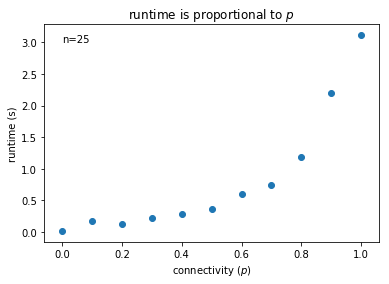

In [63]:
n = 25
y = []

for phat in np.linspace(0,1,11):
    print(phat)
    y += [sum(measure_runtime(n=n, p=phat)[2:])]

plt.scatter(np.linspace(0,1,11), y)
plt.title(r'runtime is proportional to $p$')
plt.ylabel('runtime (s)')
plt.xlabel(r'connectivity ($p$)')
plt.text(0, 3, r'n={}'.format(n))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


Text(0,2,'p=0.25')

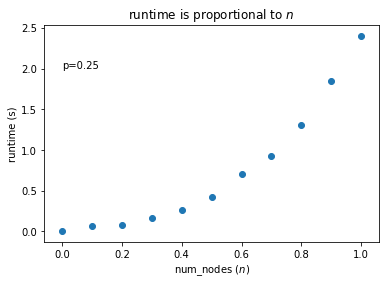

In [65]:
p = 0.25
y = []

for n in np.linspace(1,75,11):
    print(phat)
    y += [sum(measure_runtime(n=n, p=p)[2:])]

plt.scatter(np.linspace(0,1,11), y)
plt.title(r'runtime is proportional to $n$')
plt.ylabel('runtime (s)')
plt.xlabel(r'num_nodes ($n$)')
plt.text(0, 2, r'p={}'.format(p))